[0.6 0.3 0.5]


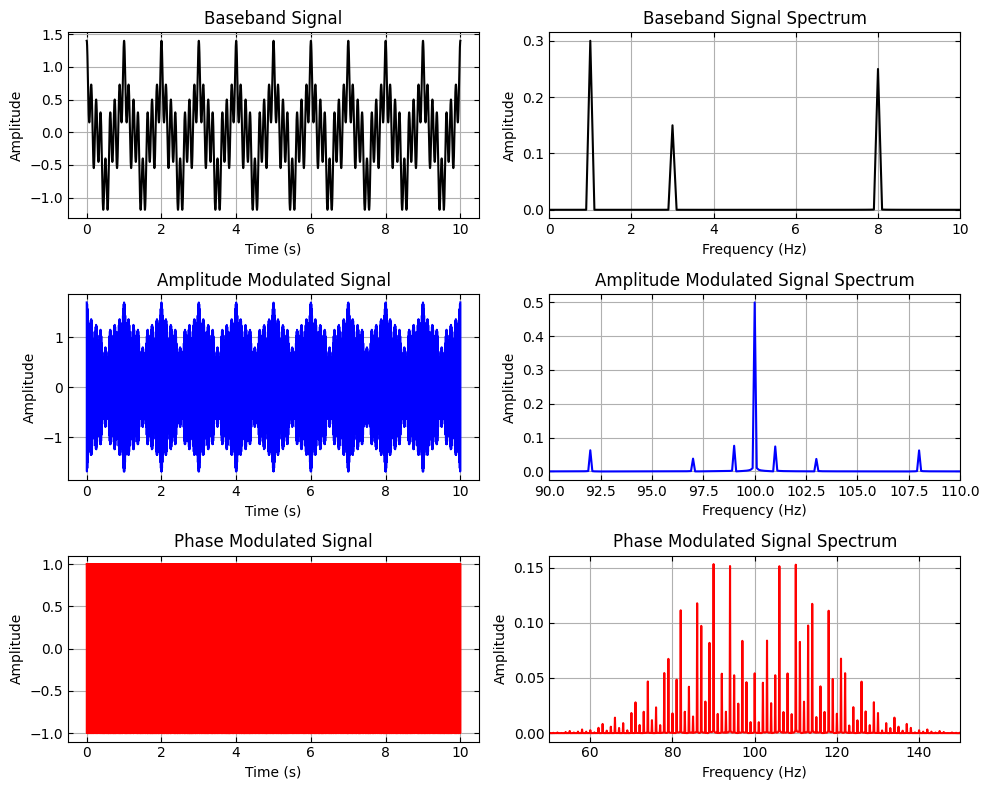

In [13]:
import matplotlib.pyplot as plt
import numpy as np

import commsym.commsym as cs

# Parameters of the baseband signal
freqs = [1, 3, 8]
ampls = np.random.randint(1, 10, 3) / 10
print(ampls)
duration = 10
sampling_rate = 5000

# Generate the baseband signal
baseband_signal = (
    cs.generate_tone(freqs[0], ampls[0], duration, sampling_rate)[1]
    + cs.generate_tone(freqs[1], ampls[1], duration, sampling_rate)[1]
    + cs.generate_tone(freqs[2], ampls[2], duration, sampling_rate)[1]
)
time = cs.generate_tone(freqs[0], ampls[0], duration, sampling_rate)[0]

# Modulation Parameters
carrier_frequency = 100
carrier_amplitude = 1
amplitude_sensitivity = 0.5
Vpi = baseband_signal.max() / 2

# Generate the modulated signals
am_signal = cs.am(
    carrier_frequency, carrier_amplitude, amplitude_sensitivity, baseband_signal, time
)
pm_signal = cs.pm(carrier_frequency, carrier_amplitude, Vpi, baseband_signal, time)

# Spectral Analysis
baseband_frequency, baseband_magnitude = cs.spectrum_analyzer(
    baseband_signal, sampling_rate
)
am_frequency, am_magnitude = cs.spectrum_analyzer(am_signal, sampling_rate)
pm_frequency, pm_magnitude = cs.spectrum_analyzer(pm_signal, sampling_rate)


# # Plotting the results
plt.figure(figsize=(10, 8))

# Plot Baseband Signal
plt.subplot(3, 2, 1)
plt.plot(time, baseband_signal, color="black")
plt.title("Baseband Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.tick_params(direction="in", top=True, right=True)
plt.grid(True)

# Plot Baseband Spectrum
plt.subplot(3, 2, 2)
plt.plot(baseband_frequency, baseband_magnitude, color="black")
plt.title("Baseband Signal Spectrum")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.xlim(0, 10)
plt.tick_params(direction="in", top=True, right=True)
plt.grid(True)

# Plot AM Signal
plt.subplot(3, 2, 3)
plt.plot(time, am_signal, color="blue")
plt.title("Amplitude Modulated Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.tick_params(direction="in", top=True, right=True)
plt.grid(True)

# Plot AM Spectrum
plt.subplot(3, 2, 4)
plt.plot(am_frequency, am_magnitude, color="blue")
plt.title("Amplitude Modulated Signal Spectrum")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.xlim(90, 110)
plt.tick_params(direction="in", top=True, right=True)
plt.grid(True)

# Plot PM Signal
plt.subplot(3, 2, 5)
plt.plot(time, pm_signal, color="red")
plt.title("Phase Modulated Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.tick_params(direction="in", top=True, right=True)
plt.grid(True)

# Plot PM Spectrum
plt.subplot(3, 2, 6)
plt.plot(pm_frequency, pm_magnitude, color="red")
plt.title("Phase Modulated Signal Spectrum")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.xlim(50, 150)
plt.tick_params(direction="in", top=True, right=True)
plt.grid(True)

plt.tight_layout()
plt.show()

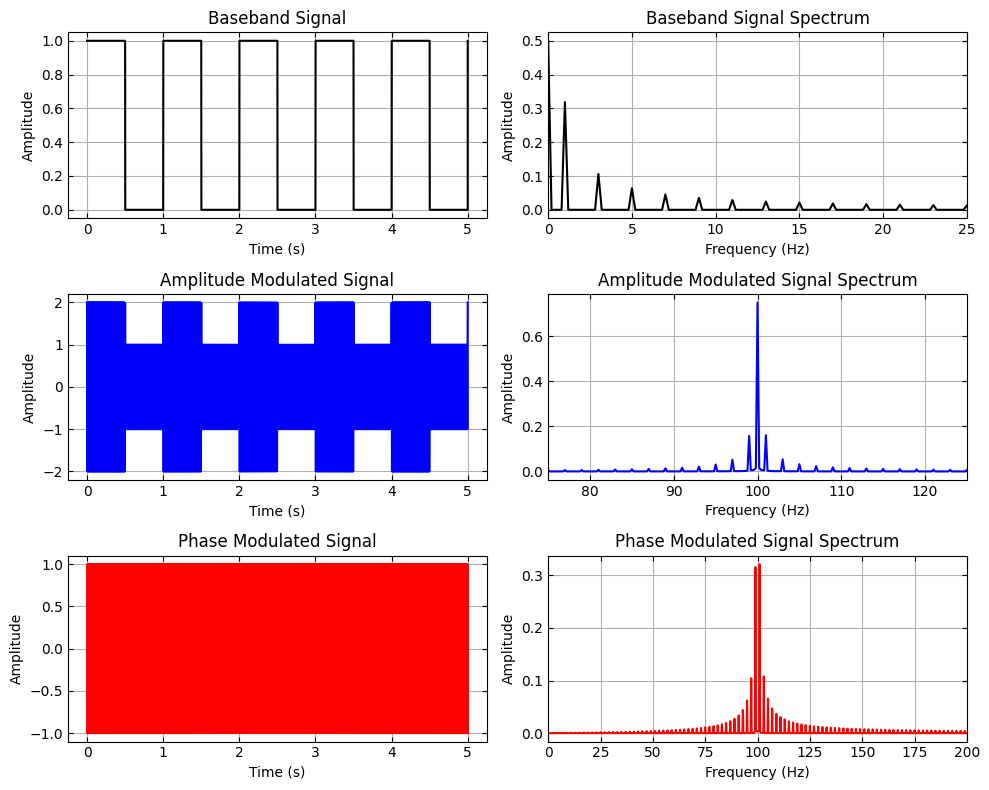

In [24]:
import matplotlib.pyplot as plt
import numpy as np

import commsym.commsym as cs

# Pulse train parameters
pulse_rate = 1
pulse_amplitude = 1
fill_factor = 0.5
duration = 5
sampling_rate = 5000

# Generate the pulse train
time, baseband_signal = cs.generate_pulse_train(
    pulse_rate, pulse_amplitude, fill_factor, duration, sampling_rate
)

# Modulation Parameters
carrier_frequency = 100
carrier_amplitude = 1
amplitude_sensitivity = 1
Vpi = baseband_signal.max()

# Generate the modulated signals
am_signal = cs.am(
    carrier_frequency, carrier_amplitude, amplitude_sensitivity, baseband_signal, time
)
pm_signal = cs.pm(carrier_frequency, carrier_amplitude, Vpi, baseband_signal, time)

# Spectral Analysis
baseband_frequency, baseband_magnitude = cs.spectrum_analyzer(
    baseband_signal, sampling_rate
)
am_frequency, am_magnitude = cs.spectrum_analyzer(am_signal, sampling_rate)
pm_frequency, pm_magnitude = cs.spectrum_analyzer(pm_signal, sampling_rate)


# # Plotting the results
plt.figure(figsize=(10, 8))

# Plot Baseband Signal
plt.subplot(3, 2, 1)
plt.plot(time, baseband_signal, color="black")
plt.title("Baseband Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.tick_params(direction="in", top=True, right=True)
plt.grid(True)

# Plot Baseband Spectrum
plt.subplot(3, 2, 2)
plt.plot(baseband_frequency, baseband_magnitude, color="black")
plt.title("Baseband Signal Spectrum")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.xlim(0, 25)
plt.tick_params(direction="in", top=True, right=True)
plt.grid(True)

# Plot AM Signal
plt.subplot(3, 2, 3)
plt.plot(time, am_signal, color="blue")
plt.title("Amplitude Modulated Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.tick_params(direction="in", top=True, right=True)
plt.grid(True)

# Plot AM Spectrum
plt.subplot(3, 2, 4)
plt.plot(am_frequency, am_magnitude, color="blue")
plt.title("Amplitude Modulated Signal Spectrum")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.xlim(75, 125)
plt.tick_params(direction="in", top=True, right=True)
plt.grid(True)

# Plot PM Signal
plt.subplot(3, 2, 5)
plt.plot(time, pm_signal, color="red")
plt.title("Phase Modulated Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.tick_params(direction="in", top=True, right=True)
plt.grid(True)

# Plot PM Spectrum
plt.subplot(3, 2, 6)
plt.plot(pm_frequency, pm_magnitude, color="red")
plt.title("Phase Modulated Signal Spectrum")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.xlim(0, 200)
plt.tick_params(direction="in", top=True, right=True)
plt.grid(True)

plt.tight_layout()
plt.show()

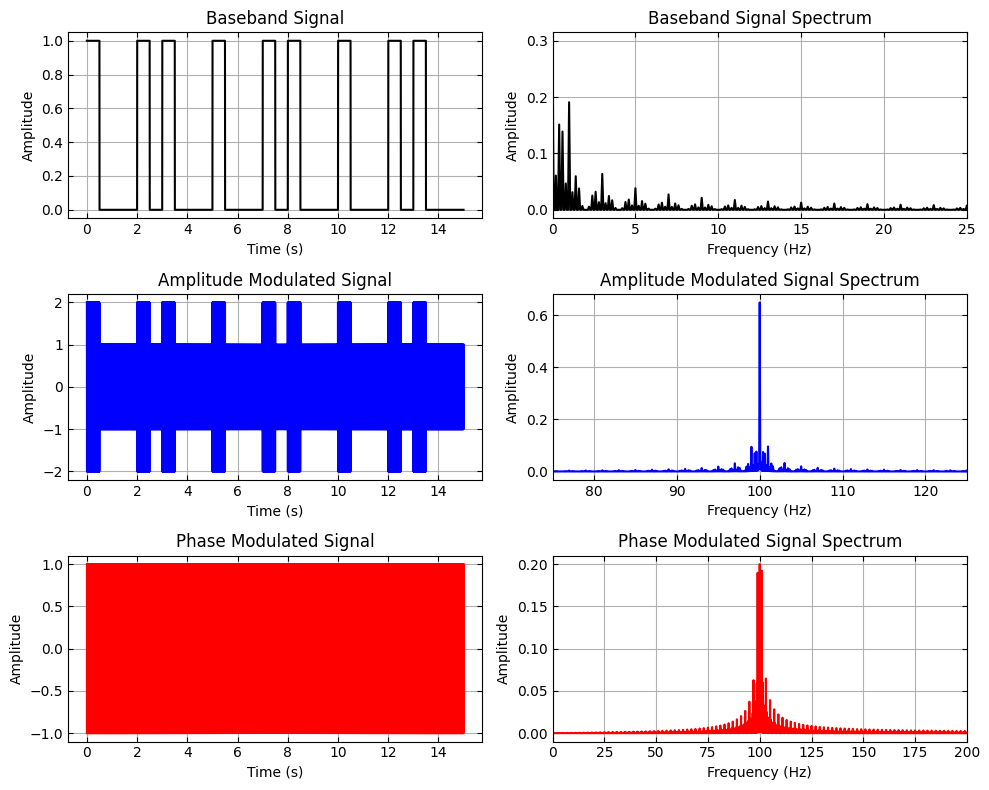

In [26]:
import matplotlib.pyplot as plt
import numpy as np

import commsym.commsym as cs

# Pulse sequence parameters
pulse_rate = 1
pulse_amplitude = 1
fill_factor = 0.5
bit_stream = [1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,]
sampling_rate = 5000

# Generate the pulse sequence
time, baseband_signal = cs.generate_pulse_sequence(
    pulse_rate, pulse_amplitude, fill_factor, bit_stream, sampling_rate
)

# Modulation Parameters
carrier_frequency = 100
carrier_amplitude = 1
amplitude_sensitivity = 1
Vpi = baseband_signal.max()

# Generate the modulated signals
am_signal = cs.am(
    carrier_frequency, carrier_amplitude, amplitude_sensitivity, baseband_signal, time
)
pm_signal = cs.pm(carrier_frequency, carrier_amplitude, Vpi, baseband_signal, time)

# Spectral Analysis
baseband_frequency, baseband_magnitude = cs.spectrum_analyzer(
    baseband_signal, sampling_rate
)
am_frequency, am_magnitude = cs.spectrum_analyzer(am_signal, sampling_rate)
pm_frequency, pm_magnitude = cs.spectrum_analyzer(pm_signal, sampling_rate)


# # Plotting the results
plt.figure(figsize=(10, 8))

# Plot Baseband Signal
plt.subplot(3, 2, 1)
plt.plot(time, baseband_signal, color="black")
plt.title("Baseband Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.tick_params(direction="in", top=True, right=True)
plt.grid(True)

# Plot Baseband Spectrum
plt.subplot(3, 2, 2)
plt.plot(baseband_frequency, baseband_magnitude, color="black")
plt.title("Baseband Signal Spectrum")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.xlim(0, 25)
plt.tick_params(direction="in", top=True, right=True)
plt.grid(True)

# Plot AM Signal
plt.subplot(3, 2, 3)
plt.plot(time, am_signal, color="blue")
plt.title("Amplitude Modulated Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.tick_params(direction="in", top=True, right=True)
plt.grid(True)

# Plot AM Spectrum
plt.subplot(3, 2, 4)
plt.plot(am_frequency, am_magnitude, color="blue")
plt.title("Amplitude Modulated Signal Spectrum")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.xlim(75, 125)
plt.tick_params(direction="in", top=True, right=True)
plt.grid(True)

# Plot PM Signal
plt.subplot(3, 2, 5)
plt.plot(time, pm_signal, color="red")
plt.title("Phase Modulated Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.tick_params(direction="in", top=True, right=True)
plt.grid(True)

# Plot PM Spectrum
plt.subplot(3, 2, 6)
plt.plot(pm_frequency, pm_magnitude, color="red")
plt.title("Phase Modulated Signal Spectrum")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.xlim(0, 200)
plt.tick_params(direction="in", top=True, right=True)
plt.grid(True)

plt.tight_layout()
plt.show()

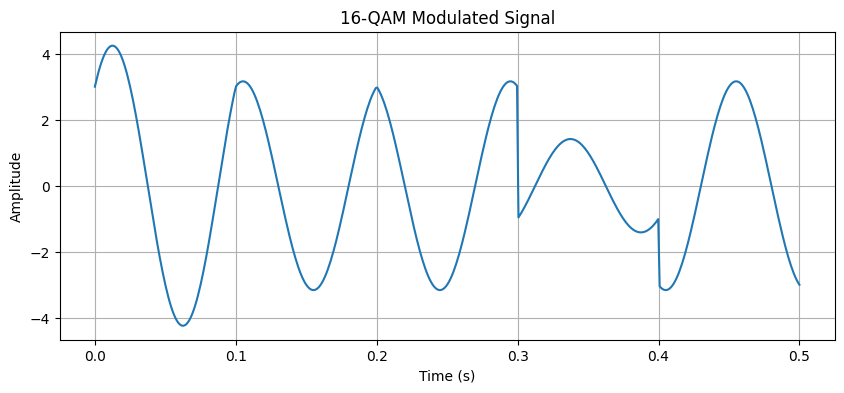

In [53]:
def qam_modulate(data, carrier_freq, sampling_rate, symbol_rate, constellation):
    # Number of bits per symbol (depends on the constellation size)
    bits_per_symbol = int(np.log2(len(constellation)))

    # Ensure data length is a multiple of bits_per_symbol
    if len(data) % bits_per_symbol != 0:
        raise ValueError("Length of data must be a multiple of bits per symbol.")

    # Time array
    num_symbols = len(data) // bits_per_symbol
    symbol_duration = 1 / symbol_rate
    time = np.linspace(
        0, num_symbols * symbol_duration, num_symbols * int(sampling_rate / symbol_rate)
    )

    # Generate I and Q components
    I_component = np.zeros_like(time)
    Q_component = np.zeros_like(time)

    for i in range(num_symbols):
        symbol_bits = tuple(data[i * bits_per_symbol : (i + 1) * bits_per_symbol])
        I, Q = constellation[symbol_bits]
        I_component[
            i
            * int(sampling_rate / symbol_rate) : (i + 1)
            * int(sampling_rate / symbol_rate)
        ] = I
        Q_component[
            i
            * int(sampling_rate / symbol_rate) : (i + 1)
            * int(sampling_rate / symbol_rate)
        ] = Q

    # Generate carrier signals
    carrier_I = np.cos(2 * np.pi * carrier_freq * time)
    carrier_Q = np.sin(2 * np.pi * carrier_freq * time)

    # Modulate the carriers
    modulated_I = I_component * carrier_I
    modulated_Q = Q_component * carrier_Q

    # Combine the modulated signals
    qam_signal = modulated_I + modulated_Q

    return time, qam_signal


# Example usage for 16-QAM
data = np.random.randint(0, 2, 20)  # Example binary data
carrier_freq = 10  # Carrier frequency in Hz
sampling_rate = 1000  # Sampling rate in Hz
symbol_rate = 10  # Symbol rate in symbols per second

# Define the 16-QAM constellation
constellation_16qam = {
    (0, 0, 0, 0): (-3, -3),
    (0, 0, 0, 1): (-3, -1),
    (0, 0, 1, 0): (-3, 3),
    (0, 0, 1, 1): (-3, 1),
    (0, 1, 0, 0): (-1, -3),
    (0, 1, 0, 1): (-1, -1),
    (0, 1, 1, 0): (-1, 3),
    (0, 1, 1, 1): (-1, 1),
    (1, 0, 0, 0): (3, -3),
    (1, 0, 0, 1): (3, -1),
    (1, 0, 1, 0): (3, 3),
    (1, 0, 1, 1): (3, 1),
    (1, 1, 0, 0): (1, -3),
    (1, 1, 0, 1): (1, -1),
    (1, 1, 1, 0): (1, 3),
    (1, 1, 1, 1): (1, 1),
}

# Modulate the signal
time, qam16_signal = qam_modulate(
    data, carrier_freq, sampling_rate, symbol_rate, constellation_16qam
)

# Plotting the 16-QAM signal
plt.figure(figsize=(10, 4))
plt.plot(time, qam16_signal)
plt.title("16-QAM Modulated Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

In [32]:
constellation_16qam = {
    (0, 0, 0, 0): (-3, -3),
    (0, 0, 0, 1): (-3, -1),
    (0, 0, 1, 0): (-3, 3),
    (0, 0, 1, 1): (-3, 1),
    (0, 1, 0, 0): (-1, -3),
    (0, 1, 0, 1): (-1, -1),
    (0, 1, 1, 0): (-1, 3),
    (0, 1, 1, 1): (-1, 1),
    (1, 0, 0, 0): (3, -3),
    (1, 0, 0, 1): (3, -1),
    (1, 0, 1, 0): (3, 3),
    (1, 0, 1, 1): (3, 1),
    (1, 1, 0, 0): (1, -3),
    (1, 1, 0, 1): (1, -1),
    (1, 1, 1, 0): (1, 3),
    (1, 1, 1, 1): (1, 1),
}

print(len(constellation_16qam))
print(int(np.log2(len(constellation_16qam))))
print(tuple([1, 0, 1, 1]))
print(constellation_16qam[tuple([1, 0, 1, 1])])

16
4
(1, 0, 1, 1)
(3, 1)
